In [1]:
import math
import random
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
from board import Battleship

In [3]:
from utils import display_heatmap, plot_population_stats

## Setup The Target Board

In [4]:
battleship_board, battleship_solution = Battleship().create_board()

Correct number of pieces on board.


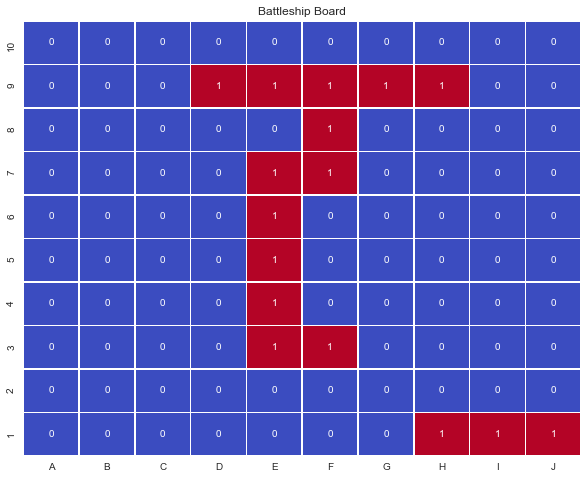

In [5]:
display_heatmap(data=battleship_board)

## Create a Random Guess

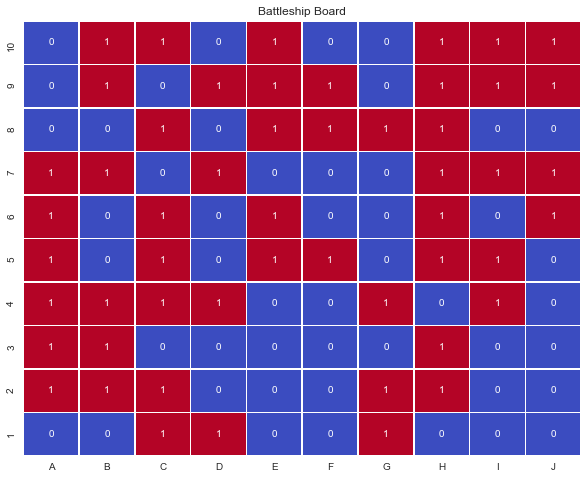

In [6]:
random_solution = np.random.randint(2, size=100).reshape((10, 10))

display_heatmap(data=random_solution)

## Define PSO

In [7]:
W = 1 # inertial weight
C1 = 2 # acceleration coefficient of personal best value
C2 = 2 # acceleration coefficient of social best value

In [8]:
class Particle(object):
    
    def __init__(self):
        
        self.position = np.random.randint(2, size=10*10)
        self.best_position = self.position
        self.best_score = 0
        self.velocity = np.zeros_like(self.position)
        
    def move(self):
        self.sigmoid_value = 1/(1 + np.exp(-self.velocity))
        
        new_position = []
        for threshold in self.sigmoid_value:
            new_position.append(1 if random.random() < threshold else 0)

        self.position = np.array(new_position)
        
    def __str__(self):
        print(f'Particle in position: {self.position}, with best position: {self.best_position}')

In [9]:
class Space(object):
    """Generate PSO for Battleship problem.""" 
    
    def __init__(self, solution, num_particles):
        
        self.particles = [Particle() for _ in range(num_particles)]
        self.num_particles = num_particles
        
        self.solution = solution
        
        self.global_best_particle = None
        self.global_best_score = 0
        self.global_best_position = np.random.randint(2, size=10*10)
        
        self.global_worst_particle = None
        self.global_worst_score = float('inf')
        self.global_worst_position = np.random.randint(2, size=10*10)
        
        self.fitness_score_to_plot = []
        
        self.name = 'PSO for Battleship board.'
        print('PSO for Battleship board successfully initialized.')

    def evaluate_fitness(self, actual_solution, candidate_solution):
        
        # define fitness function specific to the problem
        num_cell_matches = 0
        
        for i in range(len(actual_solution)):
            if actual_solution[i] == str(candidate_solution[i]):
                num_cell_matches += 1
                
        return num_cell_matches / len(actual_solution)
    
    def move_particles(self):
        
        for particle in self.particles:
            
            global W
            
            initial_velocity = (W * particle.velocity)
            cognitive_force =  (C1 * random.random()) * (particle.best_position - particle.position)
            social_force = (C2 * random.random()) * (self.global_best_position - particle.position)
            
            new_velocity = initial_velocity + cognitive_force + social_force
            new_velocity = np.clip(new_velocity, a_min=-4, a_max=4)
            
            particle.velocity = new_velocity
            
            particle.move()
            
    def set_particle_best(self):
        
        for particle in self.particles:
            
            fitness_candidate = self.evaluate_fitness(self.solution, particle.position)
            
            if (particle.best_score < fitness_candidate):
                
                particle.best_score = fitness_candidate
                particle.best_position = particle.position
                
    def set_global_best(self):
        
        for particle in self.particles:
            
            best_fitness_candidate = self.evaluate_fitness(self.solution, particle.position)
            
            if (self.global_best_score < best_fitness_candidate):
                
                self.global_best_score = best_fitness_candidate
                self.global_best_position = particle.position
                
    def set_elitist_strategy(self):
        
        for particle in self.particles:
            
            worst_fitness_candidate = self.evaluate_fitness(self.solution, particle.position)
            
            if (self.global_worst_score > worst_fitness_candidate):
                self.global_worst_particle = particle
                self.global_worst_score = worst_fitness_candidate
        
        self.global_worst_particle.position = self.global_best_position
        self.global_worst_score = 0
            
    def print_particles(self):
        
        for particle in self.particles:
            particle.__str__()

In [10]:
PSO = Space(solution=battleship_solution, num_particles=40)

PSO for Battleship board successfully initialized.


In [11]:
num_iterations = 100

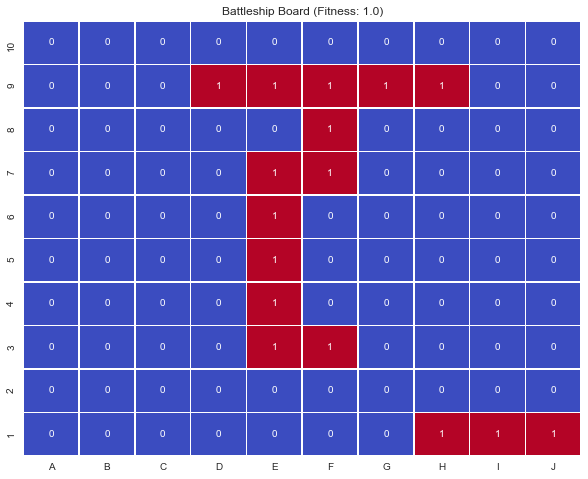

In [12]:
for i_iter in range(1, num_iterations+1):
     
    PSO.move_particles()
    
    PSO.set_particle_best()
    PSO.set_global_best()
    PSO.set_elitist_strategy()
    
    fitness_score = PSO.global_best_score
    PSO.fitness_score_to_plot.append(fitness_score)
    
    candidate_solution = np.array(PSO.global_best_position).reshape(10, 10)
            
    clear_output(wait=True)
    display_heatmap(data=candidate_solution, fitness=fitness_score)

## Evaluate PSO

#### 1) Board Solution

In [13]:
pso_solution = np.array(PSO.global_best_position).reshape(10, 10)

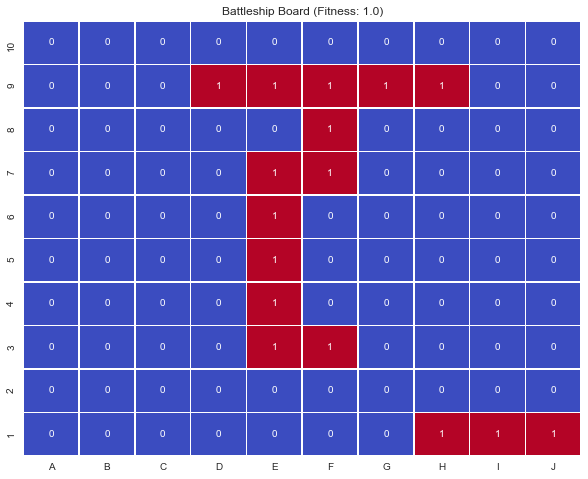

In [14]:
display_heatmap(data=pso_solution, fitness=PSO.global_best_score, cmap='coolwarm')

#### 2) Plot Fitness Score

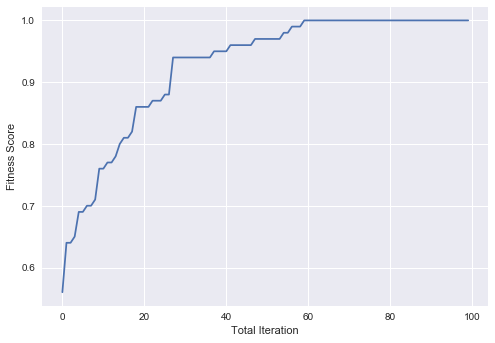

In [15]:
plt.plot(PSO.fitness_score_to_plot)
plt.xlabel('Total Iteration')
plt.ylabel('Fitness Score')
plt.savefig('./images/plot_fitness_score.png')
plt.show()

---

---